In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
base_path = '/content/drive/MyDrive/Internship/IDX Partners'
data_path = os.path.join(base_path, 'Dataset')

In [ ]:
df = pd.read_csv(os.path.join(data_path, 'cleaned-model-v1.csv'))
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466256 entries, 0 to 466255
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466256 non-null  int64  
 1   funded_amnt                 466256 non-null  int64  
 2   funded_amnt_inv             466256 non-null  float64
 3   term                        466256 non-null  int64  
 4   int_rate                    466256 non-null  float64
 5   installment                 466256 non-null  float64
 6   grade                       466256 non-null  int64  
 7   emp_length                  466256 non-null  int64  
 8   home_ownership              466256 non-null  int64  
 9   annual_inc                  466256 non-null  float64
 10  verification_status         466256 non-null  int64  
 11  pymnt_plan                  466256 non-null  int64  
 12  dti                         466256 non-null  float64
 13  delinq_2yrs   

## Feature Engineering

In [ ]:
# Feature Standardization/Normalization

# Standardize the feature
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # creating an instance of the class object (x-mu/sd)
df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']] = sc.fit_transform(df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']])

In [ ]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,employed,risk_assessment
0,-1.124494,-1.123065,-1.114611,36,-0.729655,-1.105678,1,10,0,-0.896558,...,0.00,-0.531513,0.0,1,0.0,-0.012089,-0.722478,-0.002002,0,1
1,-1.426195,-1.425209,-1.412904,60,0.330572,-1.528875,2,0,0,-0.787394,...,1.11,-0.540867,0.0,1,0.0,-0.012089,-0.803695,-0.095949,1,0
2,-1.438263,-1.437295,-1.424957,36,0.488918,-1.428251,2,10,0,-1.110302,...,0.00,-0.445410,0.0,1,0.0,-0.012089,-0.795078,-0.095949,0,1
3,-0.521090,-0.518776,-0.508986,36,-0.077914,-0.381019,2,10,0,-0.438068,...,0.00,-0.498054,0.0,1,0.0,-0.012089,-0.777139,-0.095949,1,1
4,-1.365855,-1.364780,-1.352643,60,-0.261503,-1.496183,1,1,0,0.122310,...,0.00,-0.550204,0.0,1,0.0,-0.012089,-0.626500,-0.002002,1,1


### Split the dataset

In [ ]:
# Split training and test set
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Oversampling

In [ ]:
# example of random oversampling to balance the class distribution
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({1: 408965, 0: 57291})
Counter({1: 408965, 0: 408965})


#### Feature Importance

Feature: loan_amnt, Score: 0.011935396841251921
Feature: funded_amnt, Score: 0.1174819689818256
Feature: funded_amnt_inv, Score: 0.00853131387798343
Feature: term, Score: 0.0007515164363450141
Feature: int_rate, Score: 0.01011284734426418
Feature: installment, Score: 0.010164638055604299
Feature: grade, Score: 0.0030161789757698226
Feature: emp_length, Score: 0.004731883164345634
Feature: home_ownership, Score: 0.0016905126163461004
Feature: annual_inc, Score: 0.011602080513821408
Feature: verification_status, Score: 0.0022470428036893766
Feature: pymnt_plan, Score: 8.253337312061094e-07
Feature: dti, Score: 0.01406359385629895
Feature: delinq_2yrs, Score: 0.002921458684762171
Feature: inq_last_6mths, Score: 0.014158931816949188
Feature: mths_since_last_delinq, Score: 0.006908274752417885
Feature: mths_since_last_record, Score: 0.0034196075681699515
Feature: open_acc, Score: 0.0077305579654640385
Feature: pub_rec, Score: 0.0010410746383036362
Feature: revol_bal, Score: 0.01357730270551

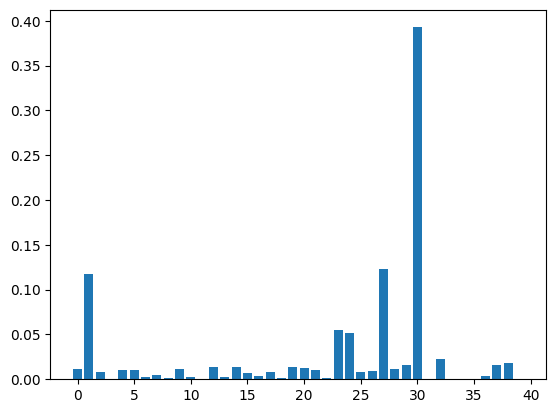

In [ ]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print(f'Feature: {df.columns[i]}, Score: {v}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Modelling

### Training

In [ ]:
model_metrics = {
    'logistic_regression': {
        'accuracy': 0,
        'precision': 0,
        'recall': 0,
        'f1': 0,
    },
    'random_forest': {
        'accuracy': 0,
        'precision': 0,
        'recall': 0,
        'f1': 0,
    },
    'decision_tree': {
        'accuracy': 0,
        'precision': 0,
        'recall': 0,
        'f1': 0,
    }
}

##### Logistic Regression Model

###### Before oversampling

In [ ]:
# Training before oversampling
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()
model_log.fit(X_train, y_train)

y_pred = model_log.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

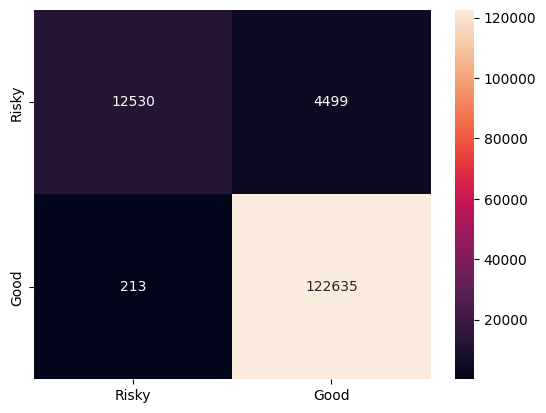

In [ ]:
# Model evaluation before oversampling
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Risky','Good'],
            yticklabels=['Risky','Good'])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
model_metrics['logistic_regression']['accuracy'] = accuracy
print("Logistic Regression Accuracy   :", accuracy)

precision = precision_score(y_test, y_pred)
model_metrics['logistic_regression']['precision'] = precision
print("Logistic Regression Precision :", precision)

recall = recall_score(y_test, y_pred)
model_metrics['logistic_regression']['recall'] = recall
print("Logistic Regression Recall    :", recall)

F1_score = f1_score(y_test, y_pred)
model_metrics['logistic_regression']['f1'] = F1_score
print("Logistic Regression F1-score  :", F1_score)

Logistic Regression Accuracy   : 0.9663132609363941
Logistic Regression Precision : 0.9646121415199711
Logistic Regression Recall    : 0.9982661500390727
Logistic Regression F1-score  : 0.981150642846285


###### After oversampling

In [ ]:
# Training after oversampling
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()
model_log.fit(X_train, y_train)

y_pred = model_log.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

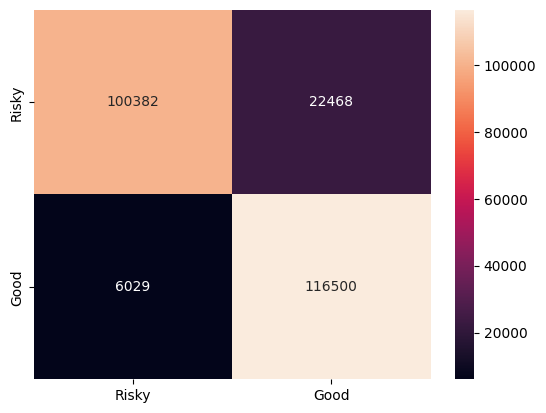

In [ ]:
# Model evaluation after oversampling
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Risky','Good'],
            yticklabels=['Risky','Good'])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Finding precision and recall after oversampling
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

Accuracy   : 0.8838653674519824
Precision : 0.8383224915088365
Recall    : 0.9507953219237895
F1-score  : 0.8910236063893658


##### Random Forest Model

In [ ]:
# Training before oversampling
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

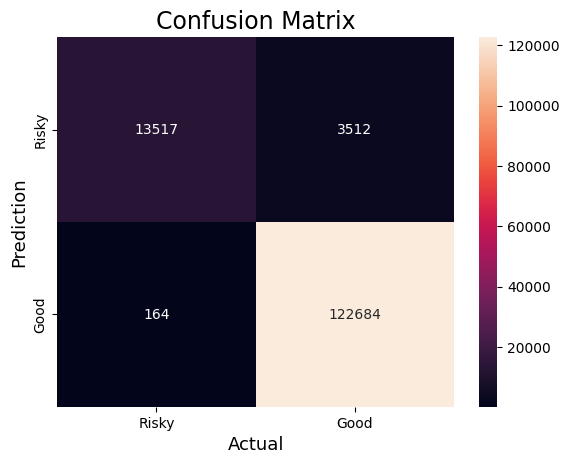

In [ ]:
# Model evaluation before oversampling
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Risky','Good'],
            yticklabels=['Risky','Good'])

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred_rf)
model_metrics['random_forest']['accuracy'] = accuracy
print("Random Forest Accuracy   :", accuracy)

precision = precision_score(y_test, y_pred_rf)
model_metrics['random_forest']['precision'] = precision
print("Random Forest Precision :", precision)

recall = recall_score(y_test, y_pred_rf)
model_metrics['random_forest']['recall'] = recall
print("Random Forest Recall    :", recall)

F1_score = f1_score(y_test, y_pred_rf)
model_metrics['random_forest']['f1'] = F1_score
print("Random Forest F1-score  :", F1_score)

Random Forest Accuracy   : 0.9737197680819577
Random Forest Precision : 0.972170274810612
Random Forest Recall    : 0.9986650169314926
Random Forest F1-score  : 0.9852395560623824


##### Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
model_dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
model_dt = model_dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = model_dt.predict(X_test)


Text(0.5, 1.0, 'Confusion Matrix')

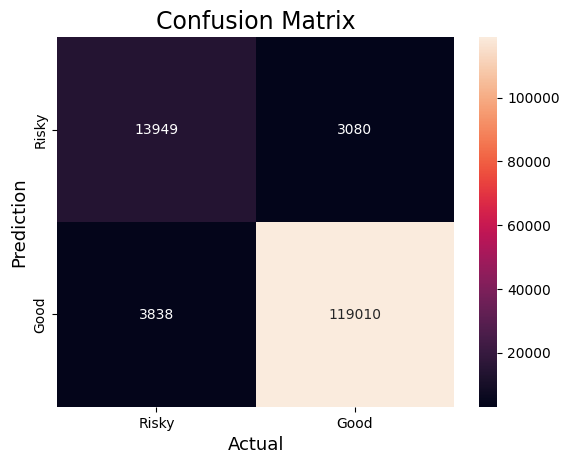

In [ ]:
# Model evaluation before oversampling
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Risky','Good'],
            yticklabels=['Risky','Good'])

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred_dt)
model_metrics['decision_tree']['accuracy'] = accuracy
print("Decision Tree Accuracy   :", accuracy)

precision = precision_score(y_test, y_pred_dt)
model_metrics['decision_tree']['precision'] = precision
print("Decision Tree Precision :", precision)

recall = recall_score(y_test, y_pred_dt)
model_metrics['decision_tree']['recall'] = recall
print("Decision Tree Recall    :", recall)

F1_score = f1_score(y_test, y_pred_dt)
model_metrics['decision_tree']['f1'] = F1_score
print("Decision Tree F1-score  :", F1_score)

Decision Tree Accuracy   : 0.9505422621303002
Decision Tree Precision : 0.9747727086575477
Decision Tree Recall    : 0.9687581401406616
Decision Tree F1-score  : 0.9717561178747275


In [ ]:
model_metrics

{'logistic_regression': {'accuracy': 0.9663132609363941,
  'precision': 0.9646121415199711,
  'recall': 0.9982661500390727,
  'f1': 0.981150642846285},
 'random_forest': {'accuracy': 0.9737197680819577,
  'precision': 0.972170274810612,
  'recall': 0.9986650169314926,
  'f1': 0.9852395560623824},
 'decision_tree': {'accuracy': 0.9505422621303002,
  'precision': 0.9747727086575477,
  'recall': 0.9687581401406616,
  'f1': 0.9717561178747275}}

In [ ]:
print(f'model with the highest accuracy: {sorted(model_metrics, key=lambda x: model_metrics[x]["accuracy"], reverse=True)[0]}')
for x in model_metrics.keys():
  print(f'{x}: {model_metrics[x]["accuracy"]}')

model with the highest accuracy: random_forest
logistic_regression 0.9663132609363941
random_forest 0.9737197680819577
decision_tree 0.9505422621303002


In [ ]:
print(f'model with the highest precision: {sorted(model_metrics, key=lambda x: model_metrics[x]["precision"], reverse=True)[0]}')
for x in model_metrics.keys():
  print(f'{x}: {model_metrics[x]["precision"]}')

model with the highest precision: decision_tree
logistic_regression: 0.9646121415199711
random_forest: 0.972170274810612
decision_tree: 0.9747727086575477


In [ ]:
print(f'model with the highest recall: {sorted(model_metrics, key=lambda x: model_metrics[x]["recall"], reverse=True)[0]}')
for x in model_metrics.keys():
  print(f'{x}: {model_metrics[x]["recall"]}')

model with the highest recall: random_forest
logistic_regression: 0.9982661500390727
random_forest: 0.9986650169314926
decision_tree: 0.9687581401406616


In [ ]:
print(f'model with the highest f1 score: {sorted(model_metrics, key=lambda x: model_metrics[x]["f1"], reverse=True)[0]}')
for x in model_metrics.keys():
  print(f'{x}: {model_metrics[x]["f1"]}')

model with the highest f1 score: random_forest
logistic_regression: 0.981150642846285
random_forest: 0.9852395560623824
decision_tree: 0.9717561178747275


## Assess Risk of Credit Loan

In [ ]:
os.mkdir(os.path.join(base_path,'trained_model'))

In [ ]:
import pickle

# save the model to disk
filename = os.path.join(base_path, 'trained_model', 'rf_model.sav')
pickle.dump(model_rf, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9737197680819577
